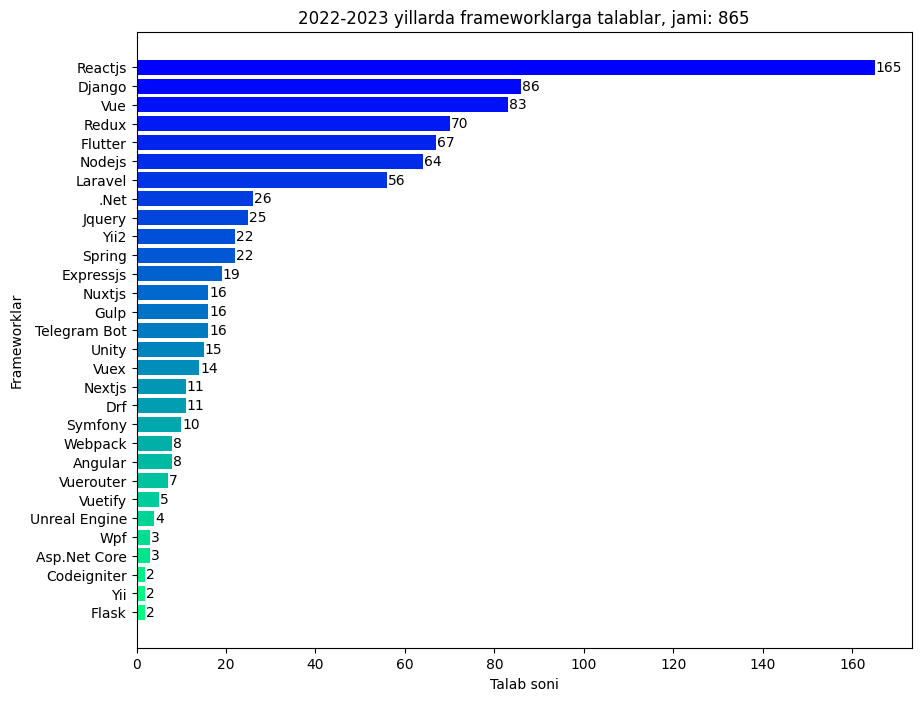

In [2]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import process
import matplotlib

matplotlib.rcParams['font.family'] = 'DejaVu Sans'

with open('../datasets/workers.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

frameworks = [
  "vue",
  "vuetify",
  "reactjs",
  "redux",
  "nextjs",
  "django",
  "drf",
  "flutter",
  "laravel",
  "yii2",
  "swiftui",
  "vuex",
  "vuerouter",
  "nuxtjs",
  "gulp",
  "webpack",
  "nodejs",
  ".net",
  "wpf",
  "unreal engine",
  "uikit",
  "asp.net",
  "entity framework",
  "orm",
  "unity",
  "spring",
  "tailwind",
  "fastapi",
  "flask",
  "asp.net core",
  "expressjs",
  "codeigniter",
  "yii",
  "angular",
  "symfony",
  "jquery",
  "telegram bot"
]

technologies_list = []
for record in data:
    techs = record.get('technologies', '').lower().replace(' ', '').split(',')
    techs = [tech for tech in techs if tech]  # Bo'sh qiymatlarni olib tashlash
    for tech in techs:
        best_match, score = process.extractOne(tech, frameworks)
        if score > 85:
            technologies_list.append(best_match.title())

tech_counter = Counter(technologies_list)
most_common_techs = tech_counter.most_common(30)

tech_names, tech_counts = zip(*most_common_techs)

colors = plt.cm.winter(np.linspace(0, 1, len(tech_counts)))

plt.figure(figsize=(10, 8))
bars = plt.barh(tech_names, tech_counts, color=colors)
plt.xlabel('Talab soni')
plt.ylabel('Frameworklar')
plt.title(f'2022-2023 yillarda frameworklarga talablar, jami: {len(technologies_list)}')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center')

plt.show()
